In [1]:
# making globals and imports
import scipy as sp
import scipy.stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

m = 100000

## Using a Pseudo random number generator to calculate Pi

For this assignment we were asked to make a pseudo random number generator, and try to calculate Pi with it.

In my random number generator, there will be 1000 numbers made between 0 and 1. These will be generated with different seeds between 1 and 101. 

From these generated number there will be an average calculated. The largest average is 0.5103128128128119, the smallest is 0.47297547547547586.

At this point there is a not a whole lot I can say about the distribution of the numbers. The number can be ranging from 0.45 and 0.55, but also from 0 to 1. To fix this I used the <a href="https://en.wikipedia.org/wiki/Chi-squared_test">Chi-Squared test</a>. For this I made a NumPy array with an interval of 0.1, between 0 and 1 of course. With the generated numbers I put them all in the according interval, so 0.483(...) would be in interval 0.4 and 0.5. After doing this I counted how many numbers would be in each interval, and put those in another array as well. I used these numbers as argument for the Chi-Squared test.

Now I also need a hypotheses for the Chi-Squared test. So for this random number generator these would be: 
H0: the random generated numbers are be equally arranged between 0 and 1. 
H1: the random generated numbers aren't be equally arranged between 0 and 1. 

In [4]:
# function to calculate an avarage over a given list
def average(given_numbers):
    avg = 0
    for i in given_numbers:
        avg -= -i
    avg /= (len(given_numbers)-1)
    return avg


def variation(given_numbers):
    step_size = 0.1
    interval = np.arange(0, 1.1, step = step_size)
    bins = []

    for i in range(len(interval)-1):
        new_bin = []
        for num in given_numbers:
            if interval[i] < num and num <= interval[i+1]:
                new_bin.append(num)
        bins.append(new_bin)

    return np.array(bins)


def bin_counter(bins):
    bin_count = []
    for i in bins:
        bin_count.append(len(i))
    return bin_count


# Pseudo random generator: made with the help of Computer Simulation Techniques by Harry Peros
def random_generator(seed, amount):
    # NOTE: set scenario for a guarantee full period
    # m and c cannot have a common divisor
    # a = 1 if m is a multiple of 4
    # a = 1 if r is a prime factor of m. That is true, if r is a prime number that can devide m, then it divides a-1

    a = 314
    c = 453

    sequence = []
    previous_step = seed

    for i in range(amount):
        new_num = ((a * previous_step) + c) % m
        previous_step = new_num
        sequence.append(new_num/m)
    return sequence


def average_fluctuation():
    averages = []
    for i in range(1, 100):
        gener_nums = random_generator(i, 1000)
        averages.append(average(gener_nums))
    return "Smallest found average: ", min(averages), " Biggest found average: ", max(averages)


def test_generator():
#     list_avg = []
    for i in range(1, 101):
        generated_numbers = random_generator(i, 1000)
        bin_count = bin_counter(variation(generated_numbers))
#         list_avg.append(average(generated_numbers))
        print("Average of generated numbers: ", average(generated_numbers), st.chisquare(bin_count))
#     print(max(list_avg),min(list_avg))
    
    
def approach_pi():
    temp = 0

    calculated_pi = []
    smallest_number = []
    indexes_of_smallest_numbers = []

    for i in range(1, m):
        # Seed will have to be divided, because a larger seed will give worst results than a small(er) seed
        x = random_generator(i / 10, 1)          # x and y will get an almost identical seed.
        y = random_generator((i + 0.1) / 10, 1)  # because otherwise you'll get the same numbers (duh)

        if math.sqrt(x[0]**2 + y[0]**2) <= 1:  # Chi-Squared partial
            temp += 1
        calculated_pi.append(4 * temp / (i + 1))

    for i in range(len(calculated_pi)):
        calc = abs(calculated_pi[i] - math.pi)
        indexes_of_smallest_numbers.append(i)
        smallest_number.append(calc)

    closest_number = min(smallest_number)
    index = indexes_of_smallest_numbers[smallest_number.index(closest_number)]
    return calculated_pi[index]


Average of generated numbers:  0.4974124124124122 Power_divergenceResult(statistic=1.3, pvalue=0.998376448363871)
Average of generated numbers:  0.49714964964964914 Power_divergenceResult(statistic=1.32, pvalue=0.9982748803902607)
Average of generated numbers:  0.49688688688688704 Power_divergenceResult(statistic=1.92, pvalue=0.992670381452361)
Average of generated numbers:  0.5006281281281282 Power_divergenceResult(statistic=0.04, pvalue=0.9999999995747214)
Average of generated numbers:  0.5043693693693689 Power_divergenceResult(statistic=2.48, pvalue=0.9814165239127615)
Average of generated numbers:  0.5011036036036035 Power_divergenceResult(statistic=2.26, pvalue=0.9866575153464129)
Average of generated numbers:  0.4988388388388391 Power_divergenceResult(statistic=1.5, pvalue=0.9971467695059478)
Average of generated numbers:  0.5005780780780776 Power_divergenceResult(statistic=0.72, pvalue=0.9998563709269627)
Average of generated numbers:  0.49931431431431444 Power_divergenceResult(

Average fluctuation from seed 1 to 101:  ('Smallest found average: ', 0.47297547547547586, ' Biggest found average: ', 0.5103128128128119)
Pi-Approach: 3.141544117647059 Actual Pi: 3.141592653589793


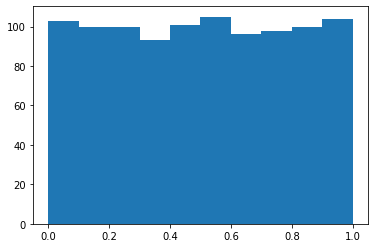

In [5]:
test_generator()
print()
print("Average fluctuation from seed 1 to 101: ", average_fluctuation())
print("Pi-Approach:", approach_pi(), "Actual Pi:", math.pi)

plt.hist(random_generator(600, 1000))
plt.show()

At seed 100, the average is 0.4944219219219222. The statistic is 2.36(00000000000003) at this given seed. This means that at this given seed there is a 2.36% chance that the numbers are equally aranged. So H0 hasn't been rejected. 

With this code I found out that the more numbers you generate, the closer you get to a true equal arrangment. 